# Проект: Анализ привычек студентов и их академической успеваемости

## 1. Описание проекта
**Цель:** Исследовать влияние привычек и образа жизни студентов на их академическую успеваемость.  
**Датасет:** [Student Habits and Academic Performance Dataset](https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset)  
**Задачи:**
- Провести разведочный анализ данных (EDA).
- Выявить ключевые факторы, влияющие на успеваемость.
- Построить модели для прогнозирования успеваемости.
- Сравнить построенные модели и выбрать лучшую

## 2. Описание данных
Датасет содержит информацию о студентах:
- Демографические данные (возраст, пол).
- Привычки (сон, питание, физическая активность).
- Учебные привычки (время учебы, использование технологий).
- Психологические факторы (стресс, мотивация).
- Академическая успеваемость (оценки, GPA).
## 3. Модели
- Линейная регрессия
- Random Forest
- kNN
## 4. Оценка моделей
- Сравнение по метрикам

In [3]:
#Подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error)

## 1. Разведочный анализ(EDA)

### 1.1 Загрузка данных

In [4]:
students = pd.read_csv("enhanced_student_habits_performance_dataset.csv")

#Первые 5 строк данных
display(students.head())

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [13]:
students.shape

(80000, 31)

В датасете всего 80000 строк и **31 признак**:
- *student_id* - yникальный идентификатор студента
- age - возраст(16-28)
- gender - пол(мужской, женский и другие)
- major - область изучения(например, компьютерные науки, искусство)
- study_hours_per_day - ежедневное среднее время учёбы 
- social_media_hours - время в соц. сетях
- netflix_hours - время в нетфликс
- part_time_job - есть ли работа(Да/Нет)
- attendance_percentage - академическая посещаемость в процентах
- sleep_hours - продолжительность сна
- diet_quality - качество питания
- exercise_frequency - частота физических упражнений
- parental_education_level - уровень образования родителей
- internet_quality - качество интернета
- mental_health_rating - оценка психического здоровья
- extracurricular_participation - внеклассное участие
- **previous_gpa** - предыдущий средний балл
- semester - семестр
- stress_level - уровень стресса
- dropout_risk - риск отчисления(зависит от уровня мотивации и стресса)(Да/Нет)
- social_activity - соц. активность
- screen_time - время на экране
- study_environment - обычное место учёбы
- access_to_tutoring - доступ к обучению
- family_income_range - диапазон доходов семьи
- parental_support_level - уровень родительской поддержки
- motivation_level - уровень мотивации
- exam_anxiety_score - тревожность на экзаменах
- learning_style - предпочтительный метод обучения
- time_management_score - оценка по тайм-менеджменту
- **exam_score** - оценка за экзамен

### 1.2 Проверка качества данных

In [15]:
missing_data = students.isnull().sum().to_frame(name='Пропущенные значения')
missing_data['% от общего'] = (missing_data['Пропущенные значения'] / len(students)) * 100
display(missing_data)

,Пропущенные значения,% от общего
student_id,0,0.0
age,0,0.0
gender,0,0.0
major,0,0.0
study_hours_per_day,0,0.0
social_media_hours,0,0.0
netflix_hours,0,0.0
part_time_job,0,0.0
attendance_percentage,0,0.0
sleep_hours,0,0.0


Нам повезло и пропущенных значений в данных **не оказалось**

### 1.3 Отбор числовых ключевых признаков

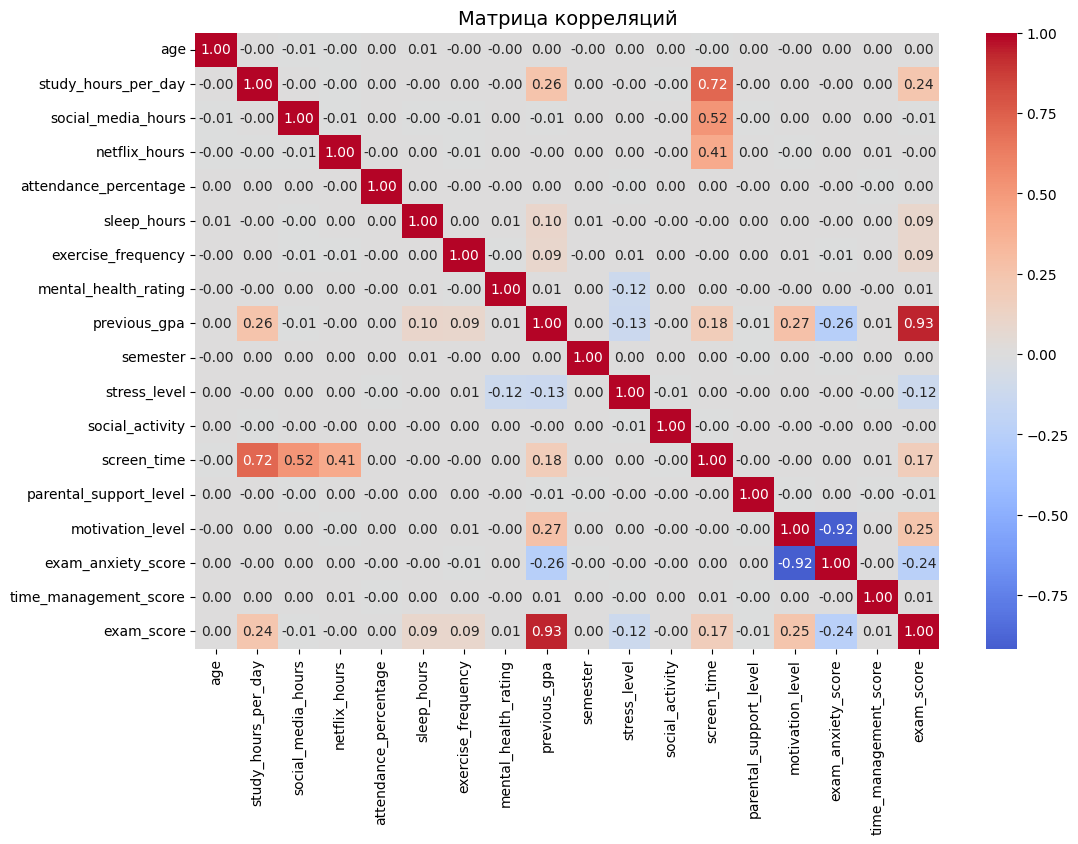

Корреляции признаков с целевой переменной:


,Feature,Corr_exam_score
1,previous_gpa,0.932940
2,motivation_level,0.250287
3,study_hours_per_day,0.241460
4,exam_anxiety_score,0.235909
5,screen_time,0.169788
6,stress_level,0.118550
7,sleep_hours,0.090820
8,exercise_frequency,0.086983
9,mental_health_rating,0.010556
10,social_media_hours,0.006351


C:\Users\User\AppData\Local\Temp\ipykernel_9116\2089488575.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Corr_exam_score', y='Feature', data=corr_combined.head(10), palette='viridis', legend=False)


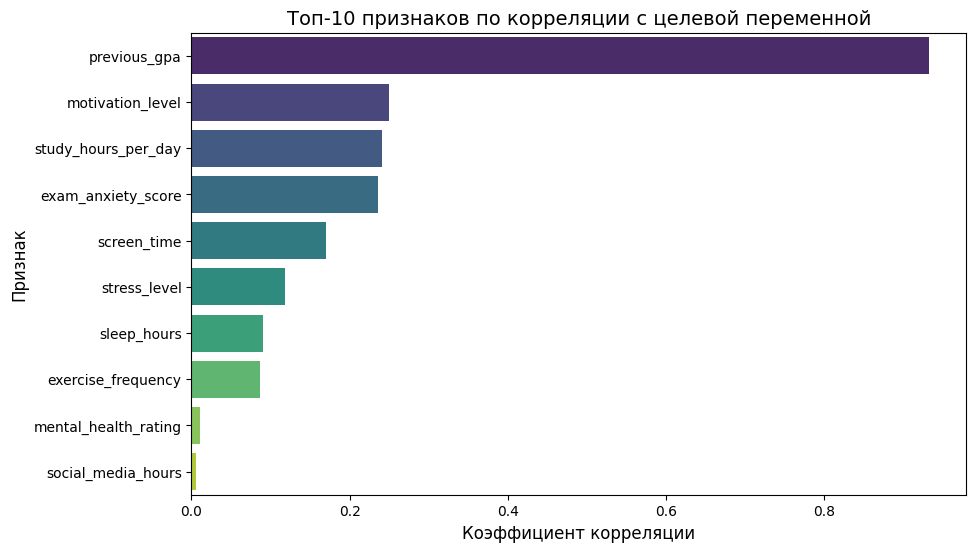

In [5]:
# Выделяем только числовые признаки
numeric_cols = students.select_dtypes(include=['int64', 'float64']).columns.to_list()
numeric_cols.remove('student_id')
numeric_students = students[numeric_cols]

# 1. Матрица корреляций
plt.figure(figsize=(12, 8))
corr_matrix = numeric_students.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Матрица корреляций", fontsize=14)
plt.show()

# Корреляции с exam_score
corr_exam_score = numeric_students.corr()['exam_score'].abs().sort_values(ascending=False)

# Объединение результатов
corr_combined = pd.DataFrame({
    'Feature': corr_exam_score.index,
    'Corr_exam_score': corr_exam_score.values,
})

print("Корреляции признаков с целевой переменной:")
corr_combined.drop(0, inplace=True)
display(corr_combined.head(10))

# Топ-10 признаков по корреляции
top_features = corr_combined.head(10)['Feature'].tolist()

# График корреляций
plt.figure(figsize=(10, 6))
sns.barplot(x='Corr_exam_score', y='Feature', data=corr_combined.head(10), palette='viridis', legend=False)
plt.title("Топ-10 признаков по корреляции с целевой переменной", fontsize=14)
plt.xlabel("Коэффициент корреляции", fontsize=12)
plt.ylabel("Признак", fontsize=12)
plt.show()

Отсюда видим, что наиболее лучшими числовыми ключевыми признаками будут:
- предыдущий средний балл
- уровень мотивации
- количество часов на учёбу в день
- тревожность на экзамене
- экранное время
- уровень стресса
- продолжительность сна
- частота физических упражнений

### 1.4 Отбор ключевых категориальных признаков

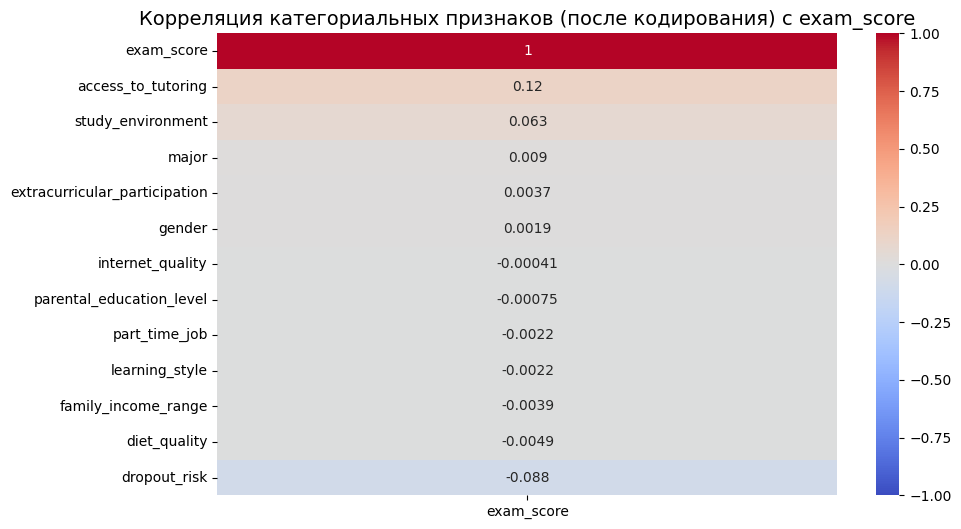

In [6]:
# Выделяем категориальные признаки
cat_cols = students.select_dtypes(include=['object']).columns
cat_students = students[cat_cols]

# Пример: корреляция между закодированными категориями и exam_score
encoded_students = students[cat_cols].apply(LabelEncoder().fit_transform)
encoded_students['exam_score'] = students['exam_score']
plt.figure(figsize=(10, 6))
sns.heatmap(encoded_students.corr()[['exam_score']].sort_values('exam_score', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция категориальных признаков (после кодирования) с exam_score', fontsize=14)
plt.show()

Отсюда видим, что наиболее лучшими категориальными ключевыми признаками будут:
- доступ к обучению
- обычное место обучения
- риск отчисления

### 1.5 Визуализация распределений

#### 1.5.1 Ключевые признаки

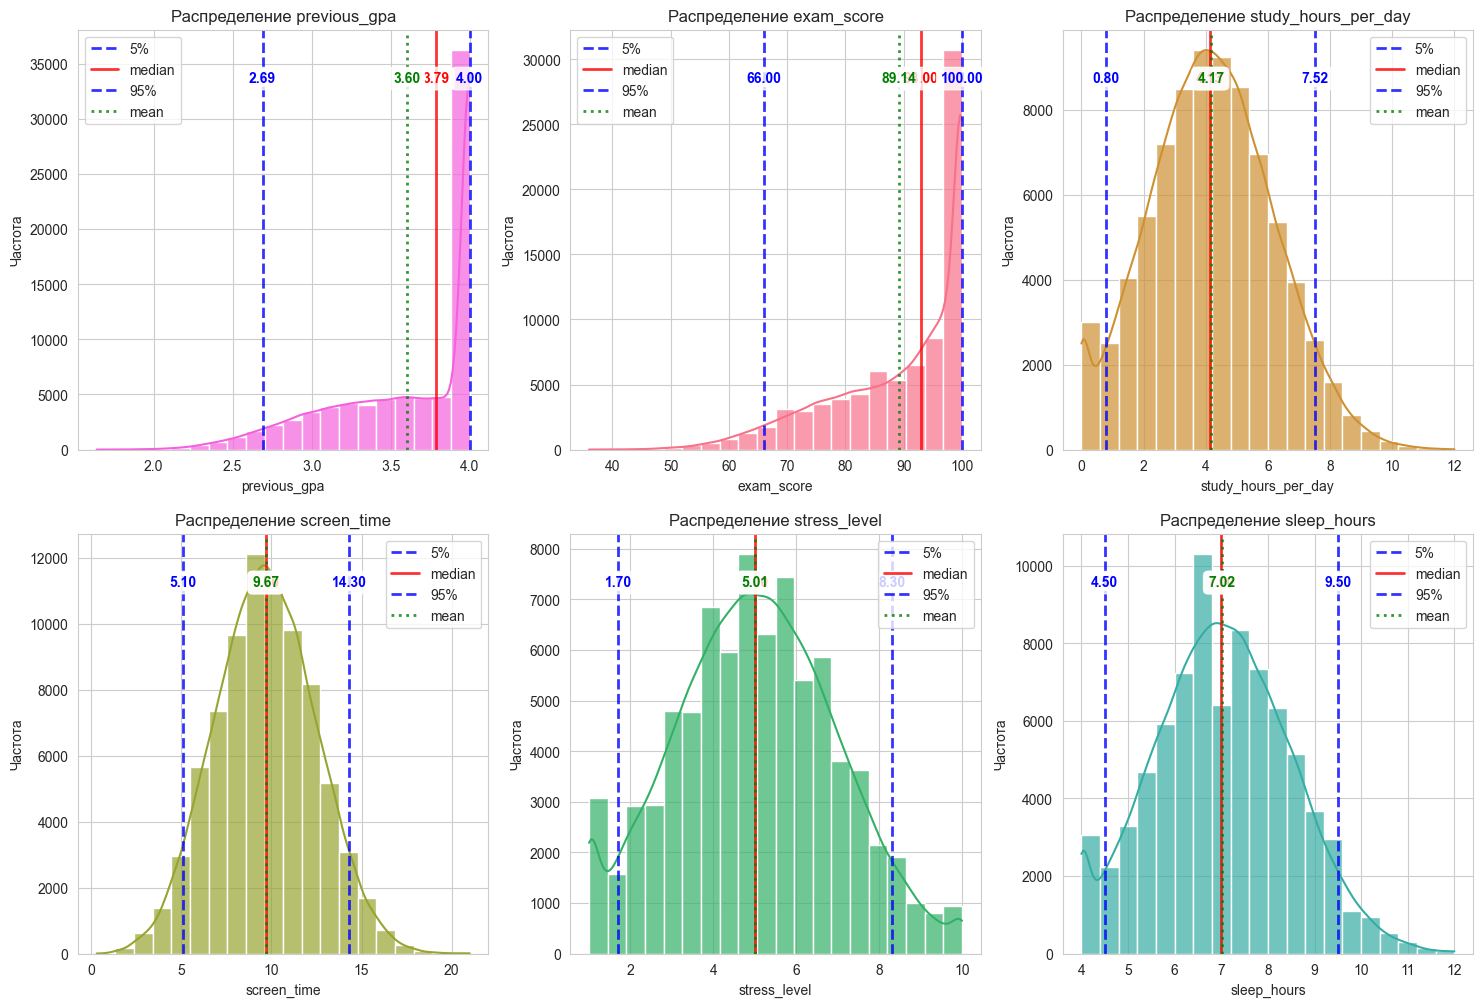

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(18, 12))
palette = sns.color_palette("husl", 8)
numeric_cols = ['previous_gpa', 'exam_score','study_hours_per_day',
                'screen_time', 'stress_level', 'sleep_hours']
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(students[col], kde=True, color=palette[i-2], bins=20, alpha=0.7)
    q1 = np.percentile(students[col], 5)
    median = np.median(students[col])
    q3 = np.percentile(students[col], 95)
    mean = np.mean(students[col])
    stats_values = [q1, median, q3, mean]
    colors = ['blue', 'red', 'blue', 'green']
    labels = ['5%', 'median', '95%', 'mean']
    linestyles = ['--', '-', '--', ':']
    for value, color, label, ls in zip(stats_values, colors, labels, linestyles):
        plt.axvline(value, color=color, linestyle=ls, linewidth=2, alpha=0.8, label=label)
        plt.text(value, plt.ylim()[1] * 0.9, f'{value:.2f}', 
            ha='center', va='top', fontweight='bold', color=color,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
    plt.legend()
    plt.title(f'Распределение {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Частота', fontsize=10)

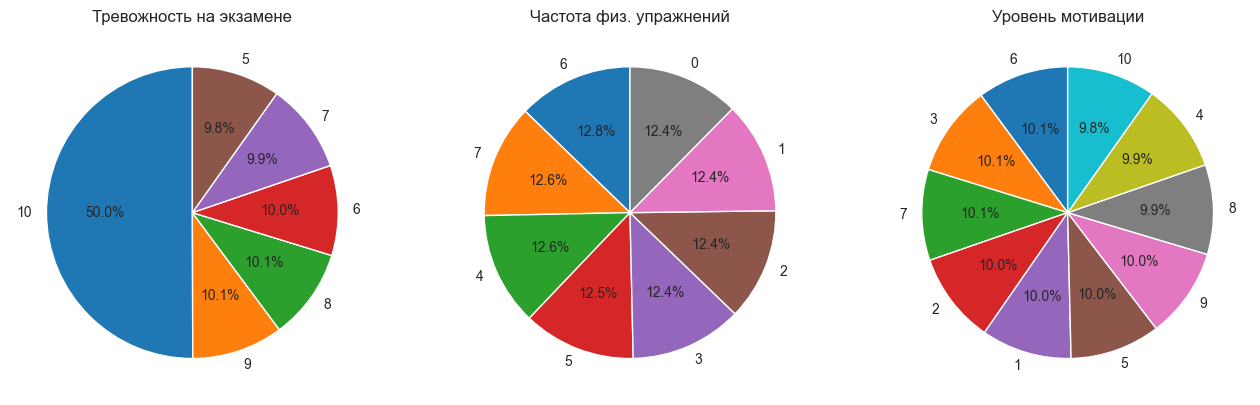

In [10]:
#sns.scatterplot(students, x='motivation_level', y='exam_anxiety_score')
plt.figure(figsize=(16, 12))
plt.subplot(131)
counts = students['exam_anxiety_score'].value_counts()
plt.pie(counts, labels=counts.index,
       autopct='%1.1f%%', startangle=90,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1},
       textprops={'fontsize': 10})
plt.title('Тревожность на экзамене')

plt.subplot(132)
counts = students['exercise_frequency'].value_counts()
plt.pie(counts, labels=counts.index,
       autopct='%1.1f%%', startangle=90,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1},
       textprops={'fontsize': 10})
plt.title('Частота физ. упражнений')

plt.subplot(133)
counts = students['motivation_level'].value_counts()
plt.pie(counts, labels=counts.index,
       autopct='%1.1f%%', startangle=90,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1},
       textprops={'fontsize': 10})
plt.title('Уровень мотивации')
plt.show()

#### 1.5.2 Категориальные признаки

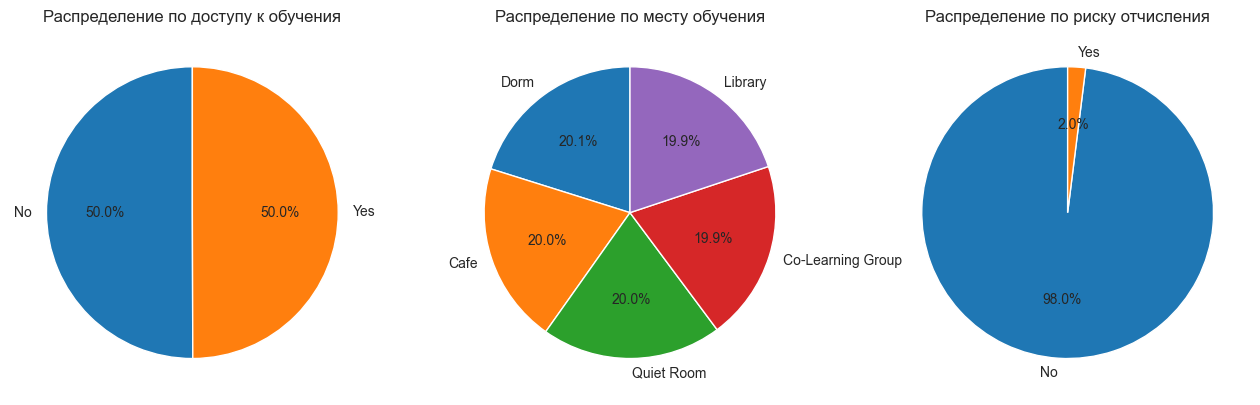

In [12]:
#Распределение по доступу к обучению
plt.figure(figsize=(16, 12))
plt.subplot(1, 3, 1)
counts = students['access_to_tutoring'].value_counts()
plt.pie(counts, labels=counts.index,
       autopct='%1.1f%%', startangle=90,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1},
       textprops={'fontsize': 10})
plt.title('Распределение по доступу к обучения')
#plt.axis('equal')  # Для идеального круга

plt.subplot(1, 3, 2)
counts = students['study_environment'].value_counts()
plt.pie(counts, labels=counts.index,
       autopct='%1.1f%%', startangle=90,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1},
       textprops={'fontsize': 10})
plt.title('Распределение по месту обучения')
#plt.axis('equal')  # Для идеального круга

plt.subplot(1, 3, 3)
counts = students['dropout_risk'].value_counts()
plt.pie(counts, labels=counts.index,
       autopct='%1.1f%%', startangle=90,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1},
       textprops={'fontsize': 10})
plt.title('Распределение по риску отчисления')
#plt.axis('equal')  # Для идеального круга
plt.show()

### 1.6 Оставляем только ключевые признаки

In [14]:
students['access_to_tutoring_encoded'] = encoded_students['access_to_tutoring']
students['study_environment_encoded'] = encoded_students['study_environment']
students['dropout_risk_encoded'] = encoded_students['dropout_risk']

data=['previous_gpa', 'exam_score', 'motivation_level','study_hours_per_day',
      'exam_anxiety_score', 'screen_time', 'stress_level', 'sleep_hours',
      'exercise_frequency','access_to_tutoring_encoded', 'study_environment_encoded', 'dropout_risk_encoded']
for col in students:
    if col not in data: students.drop(col, axis=1, inplace=True)

## 2. Построение и оценка моделей

#### 2.1 Подготовка данных

In [15]:
np.random.seed(1)#Для воспроизводимости
# Разделение на признаки и целевую переменную
X = students[['previous_gpa','motivation_level','study_hours_per_day','exam_anxiety_score',
          'screen_time', 'stress_level', 'sleep_hours', 'exercise_frequency',
         'access_to_tutoring_encoded','study_environment_encoded','dropout_risk_encoded']]
y = students['exam_score']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Масштабирование признаков
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

#### 2.2 Линейная регрессия

In [45]:
#Классическая линейная регрессия 
lin_reg = LinearRegression()
lin_reg1 = LinearRegression()

#Обучаем на не масштабированных данных
lin_reg.fit(X_train, y_train)
lin_reg1.fit(X_train_scaled, y_train)

#Предсказания
y_pred_lin = lin_reg.predict(X_test)
y1_pred_lin = lin_reg1.predict(X_test_scaled)

#Оценка качества
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
mae_lin1 = mean_absolute_error(y_test, y1_pred_lin)
mse_lin1 = mean_squared_error(y_test, y1_pred_lin)
r2_lin1 = r2_score(y_test, y1_pred_lin)
results_lin = {
    "Scaled":["Not", "Yes"],
    "MAE":[mae_lin, mae_lin1],
    "MSE":[mse_lin, mse_lin1],
    "R²":[r2_lin,r2_lin1]
}
results_lin_df = pd.DataFrame(results_lin)
results_lin_df

,Scaled,MAE,MSE,R²
0,Not,3.191856,17.313011,0.87137
1,Yes,3.191856,17.313011,0.87137


In [47]:
#L1-регуляризация, поиск гиперпараметров
param_grid = {'alpha':[1e-06,1e-05,1e-04,0.001,0.01,0.1,1]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search1 = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search1.fit(X_train_scaled, y_train)
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшие параметры, если данные масштабированы:", grid_search1.best_params_)

Лучшие параметры: {'alpha': 0.01}
Лучшие параметры, если данные масштабированы: {'alpha': 0.001}


In [48]:
#Обучение
lasso = Lasso(alpha=0.01)
lasso1 = Lasso(alpha=0.001)

#Обучаем на не масштабированных данных
lasso.fit(X_train, y_train)
lasso1.fit(X_train_scaled, y_train)

#Предсказания
y_pred_lasso = lasso.predict(X_test)
y1_pred_lasso = lasso1.predict(X_test_scaled)

#Оценка качества
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso1 = mean_absolute_error(y_test, y1_pred_lasso)
mse_lasso1 = mean_squared_error(y_test, y1_pred_lasso)
r2_lasso1 = r2_score(y_test, y1_pred_lasso)
results_lin = {
    "Scaled":["Not", "Yes"],
    "MAE":[mae_lasso, mae_lasso1],
    "MSE":[mse_lasso, mse_lasso1],
    "R²":[r2_lasso,r2_lasso1]
}
results_lasso_df = pd.DataFrame(results_lin)
results_lasso_df

,Scaled,MAE,MSE,R²
0,Not,3.194438,17.314323,0.871361
1,Yes,3.192584,17.313787,0.871365


In [51]:
#L2-регуляризация, поиск гиперпараметров
param_grid = {'alpha':np.logspace(-3,3,7)}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search1 = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
grid_search1.fit(X_train_scaled, y_train)
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшие параметры, если данные масштабированы:", grid_search1.best_params_)

Лучшие параметры: {'alpha': 0.1}
Лучшие параметры, если данные масштабированы: {'alpha': 0.01}


In [53]:
#Обучение
ridge = Ridge(alpha=0.1)
ridge1 = Ridge(alpha=0.01)

#Обучаем на не масштабированных данных
ridge.fit(X_train, y_train)
ridge1.fit(X_train_scaled, y_train)

#Предсказания
y_pred_ridge = lasso.predict(X_test)
y1_pred_ridge = lasso1.predict(X_test_scaled)

#Оценка качества
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge1 = mean_absolute_error(y_test, y1_pred_ridge)
mse_ridge1 = mean_squared_error(y_test, y1_pred_ridge)
r2_ridge1 = r2_score(y_test, y1_pred_ridge)
results_ridge = {
    "Scaled":["Not", "Yes"],
    "MAE":[mae_ridge, mae_ridge1],
    "MSE":[mse_ridge, mse_ridge1],
    "R²":[r2_ridge,r2_ridge1]
}
results_ridge_df = pd.DataFrame(results_ridge)
results_ridge_df

,Scaled,MAE,MSE,R²
0,Not,3.194438,17.314323,0.871361
1,Yes,3.192584,17.313787,0.871365


Выберем лучший вариант из всех моделей

In [55]:
results_linear_regr = pd.concat({'Классическая регрессия': results_lin_df.set_index('Scaled'),
                                 'Lasso-регрессия': results_lasso_df.set_index('Scaled'),
                                 'Ridge-регрессия': results_ridge_df.set_index('Scaled')})
#results_linear_regr.columns = results_linear_regr.columns.droplevel(2)
results_linear_regr

MAE        MSE        R²
                       Scaled                               
Классическая регрессия Not     3.191856  17.313011  0.871370
                       Yes     3.191856  17.313011  0.871370
Lasso-регрессия        Not     3.194438  17.314323  0.871361
                       Yes     3.192584  17.313787  0.871365
Ridge-регрессия        Not     3.194438  17.314323  0.871361
                       Yes     3.192584  17.313787  0.871365

Все модели +- равны по эффективности, но лучше всех показала себя классическая линейная регрессия

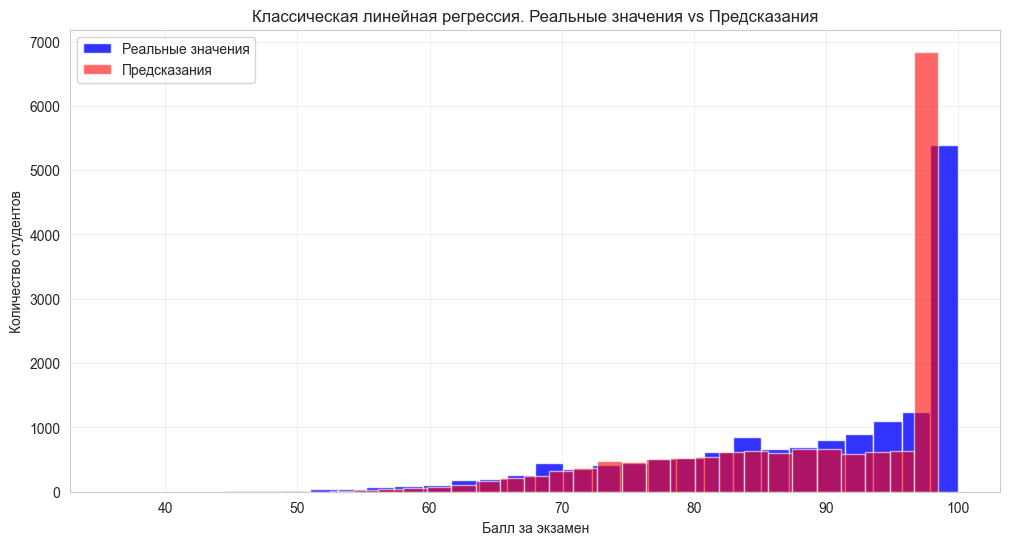

In [59]:
plt.figure(figsize=(12, 6))

# Совмещенные гистограммы
plt.hist(y_test, bins=30, alpha=0.8, label='Реальные значения', color='blue')
plt.hist(y_pred_lin, bins=30, alpha=0.6, label='Предсказания', color='red')

plt.xlabel('Балл за экзамен')
plt.ylabel('Количество студентов')
plt.title('Классическая линейная регрессия. Реальные значения vs Предсказания')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#### 2.3 kNN

In [58]:
#Подбор гиперпараметров
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)
grid_search1 = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)
grid_search1.fit(X_train_scaled, y_train)

# Лучшие параметры
print("Лучшие параметры, если данные не нормализованы:", grid_search.best_params_)
print("Лучшие параметры, если данные нормализованы:", grid_search1.best_params_)

Лучшие параметры, если данные не нормализованы: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Лучшие параметры, если данные нормализованы: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}


In [23]:
knn = KNeighborsRegressor(n_neighbors=15, metric ='manhattan', weights = 'distance')
knn1 = KNeighborsRegressor(n_neighbors=20, metric ='euclidean', weights = 'distance')
knn.fit(X_train, y_train)
knn1.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn1 = knn1.predict(X_test_scaled)

mae_kNN = mean_absolute_error(y_test, y_pred_knn)
mse_kNN = mean_squared_error(y_test, y_pred_knn)
r2_kNN = r2_score(y_test, y_pred_knn)
mae_kNN1 = mean_absolute_error(y_test, y_pred_knn1)
mse_kNN1 = mean_squared_error(y_test, y_pred_knn1)
r2_kNN1 = r2_score(y_test, y_pred_knn1)

results_kNN = {
    "Scaled":["Not", "Yes"],
    "MAE":[mae_kNN, mae_kNN1],
    "MSE":[mse_kNN, mse_kNN1],
    "R²":[r2_kNN,r2_kNN1]
}
results_kNN_df = pd.DataFrame(results_kNN)
results_kNN_df

,Scaled,MAE,MSE,R²
0,Not,5.699754,52.316221,0.611309
1,Yes,3.648077,21.518192,0.840127


Модель с ненормализованными данными показала себя значительно хуже

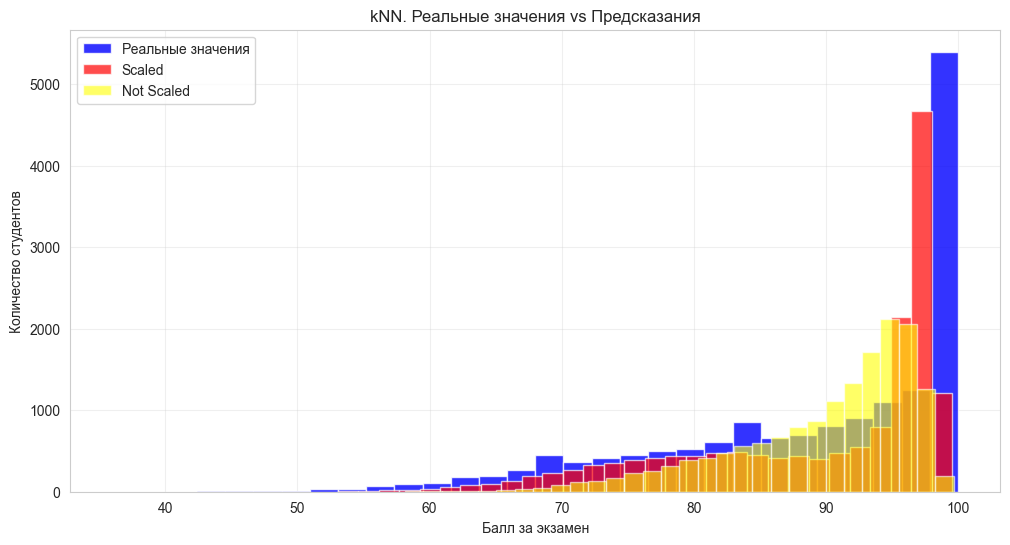

In [43]:
plt.figure(figsize=(12, 6))

# Совмещенные гистограммы
plt.hist(y_test, bins=30, alpha=0.8, label='Реальные значения', color='blue')
plt.hist(y_pred_knn1, bins=30, alpha=0.7, label='Scaled', color='red')
plt.hist(y_pred_knn, bins=30, alpha=0.6, label='Not Scaled', color='yellow')

plt.xlabel('Балл за экзамен')
plt.ylabel('Количество студентов')
plt.title('kNN. Реальные значения vs Предсказания')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#### 2.4 RandomForest

In [26]:
#Подбор гиперпараметров
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 0.6, 1.0]
}

grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search1 = GridSearchCV(
    RandomForestRegressor(),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)
grid_search1.fit(X_train_scaled, y_train)
print("Лучшие параметры, если данные не нормализованы:", grid_search.best_params_)
print("Лучшие параметры, если данные нормализованы:", grid_search.best_params_)

Лучшие параметры, если данные не нормализованы: {'max_depth': 10, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Лучшие параметры, если данные нормализованы: {'max_depth': 10, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [63]:
rfr = RandomForestRegressor(n_estimators=200, max_depth=10, max_features=0.6, min_samples_leaf = 1, min_samples_split=5, n_jobs=-1)
rfr1 = RandomForestRegressor(n_estimators=200, max_depth=10, max_features=0.6, min_samples_leaf = 1, min_samples_split=5, n_jobs=-1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr1.fit(X_train_scaled, y_train)
y_pred_rfr1 = rfr1.predict(X_test_scaled)
#Оценка качества
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)
mae_rfr1 = mean_absolute_error(y_test, y_pred_rfr1)
mse_rfr1 = mean_squared_error(y_test, y_pred_rfr1)
r2_rfr1 = r2_score(y_test, y_pred_rfr1)

results_rfr = {
    "Scaled":["Not", "Yes"],
    "MAE":[mae_rfr, mae_rfr1],
    "MSE":[mse_rfr, mse_rfr1],
    "R²":[r2_rfr,r2_rfr1]
}
results_rfr_df = pd.DataFrame(results_rfr)
results_rfr_df

,Scaled,MAE,MSE,R²
0,Not,3.221464,17.086877,0.873050
1,Yes,3.220858,17.102201,0.872937


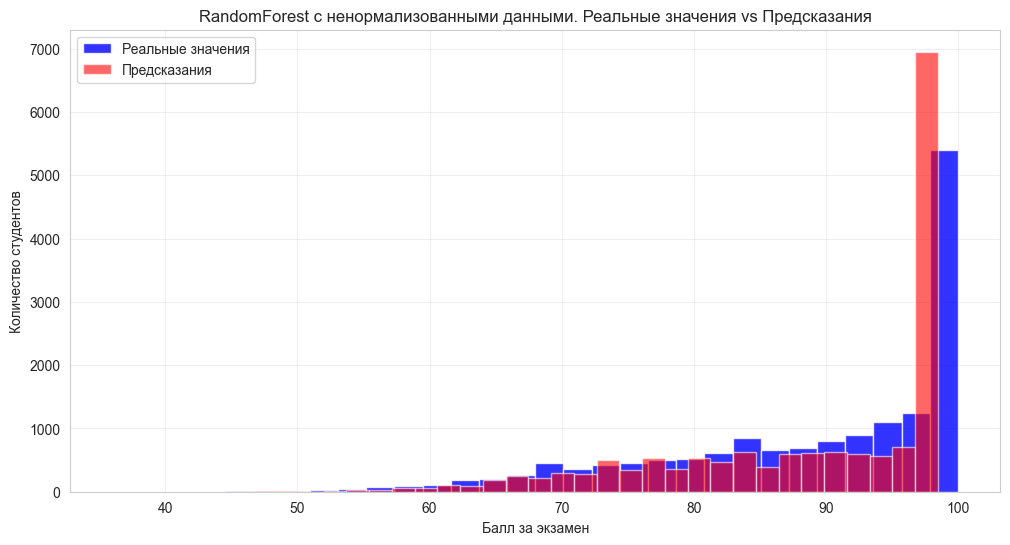

In [67]:
plt.figure(figsize=(12, 6))

# Совмещенные гистограммы
plt.hist(y_test, bins=30, alpha=0.8, label='Реальные значения', color='blue')
plt.hist(y_pred_rfr, bins=30, alpha=0.6, label='Предсказания', color='red')

plt.xlabel('Балл за экзамен')
plt.ylabel('Количество студентов')
plt.title('RandomForest с ненормализованными данными. Реальные значения vs Предсказания')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3. Заключение

**Сравнение моделей**

In [50]:
results = {
    'Model': ['Linear Regression', 'Random Forest', 'kNN'],
    'MAE': [mae_lin, mae_rfr, mae_kNN1],
    'MSE': [mse_lin, mse_rfr, mse_kNN1],
    'R²': [r2_lin, r2_rfr, r2_kNN1]
}

# Создание DataFrame
results_df = pd.DataFrame(results)
display(results_df)

,Model,MAE,MSE,R²
0,Linear Regression,3.191856,17.313011,0.871370
1,Random Forest,3.221380,17.099265,0.872958
2,kNN,3.648077,21.518192,0.840127


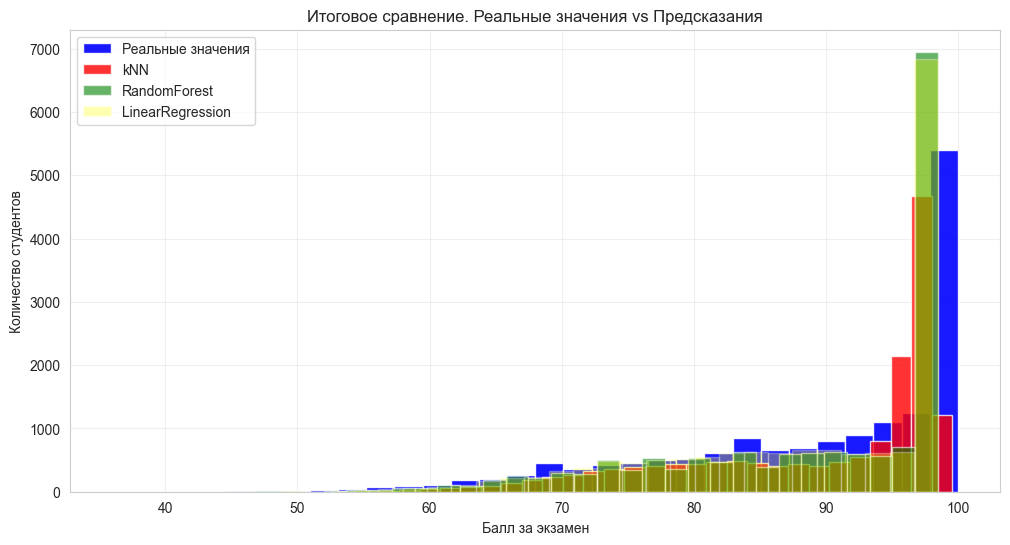

In [139]:
plt.figure(figsize=(12, 6))

# Совмещенные гистограммы
plt.hist(y_test, bins=30, alpha=0.9, label='Реальные значения', color='blue')
plt.hist(y_pred_knn1, bins=30, alpha=0.8, label='kNN', color='red')
plt.hist(y_pred_rfr, bins=30, alpha=0.6, label='RandomForest', color='green')
plt.hist(y_pred_lin, bins=30, alpha=0.3, label='LinearRegression', color='yellow')

plt.xlabel('Балл за экзамен')
plt.ylabel('Количество студентов')
plt.title('Итоговое сравнение. Реальные значения vs Предсказания')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

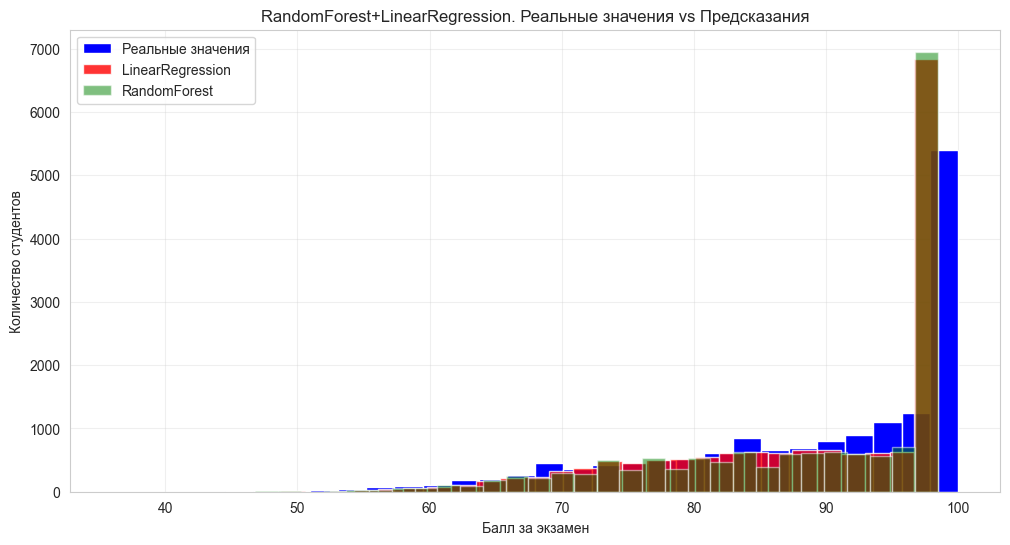

In [137]:
plt.figure(figsize=(12, 6))

# Совмещенные гистограммы
plt.hist(y_test, bins=30, alpha=1.0, label='Реальные значения', color='blue')
plt.hist(y_pred_lin, bins=30, alpha=0.8, label='LinearRegression', color='red')
plt.hist(y_pred_rfr, bins=30, alpha=0.5, label='RandomForest', color='green')

plt.xlabel('Балл за экзамен')
plt.ylabel('Количество студентов')
plt.title('RandomForest+LinearRegression. Реальные значения vs Предсказания')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Выводы по результатам сравнения моделей
1. Все модели оказались эффективными, судя по метрикам
2. Наилучшие значения метрик показала модель случайного леса, но разница с другими моделями незначительна
3. Время работы модели случайного леса и kNN значительно больше времени работы модели линейной регрессии, поэтому логично выбрать лучшей моделью именно линейную регрессию.

**Основные метрики:**
- MAE = 3.22
- r^2 = 87%
- MSE = 17
*****
Значение MAE=0.11 означает, что в среднем предсказанный средний балл студента отличается на +-0,11.
Значение r^2 = 0.88 означает, что модель хорошо описывает данные. 0,13 - неутчённые факторы
Значение MSE = 0.025 означает, что максимальное отклонение от среднего балла будет +-0,4
